In [34]:
import os
from dateutil.parser import parse

In [204]:
def load_records(directory):

    records = []

    for filename in os.listdir(directory):
        
        if not 'apply_' in filename:
            continue

        path = os.path.join(directory, filename)
        data = list(open(path))

        if any('SOME DOCUMENTS WERE NOT UPLOADED' in row for row in data):
            print('SOME DOCUMENTS WERE NOT UPLOADED')
            continue

        record = {}

        for row in data:
            values = row.split(sep=' ')
            t = values[1] if len(values) >= 2 else None

            if 'looking for a previous application' in row:
                record['start'] = parse(t)
            elif 'documents upload is finished' in row:
                record['docs_uploaded'] = parse(t)
            elif 'affiliate requests are finished!' in row:
                record['affiliate'] = parse(t)
            elif 'WE WERE READY TO PUSBLISH BUT' in row:
                record['end'] = parse(t)

        if 'end' not in record:
            print('failed upload', filename)
            continue

        records.append(record)
        
    return records

In [216]:
directory = '/home/necuk/Desktop/zakup_kz/scrapy_parser/logs/22_04_27/'
# directory = '/home/necuk/Desktop/zakup_kz/scrapy_parser/logs/22_04_27_concur10_delay01/'
# directory = '/home/necuk/Desktop/zakup_kz/scrapy_parser/logs/22_04_27_concur2_delay003/'

In [217]:
records = load_records(directory)
len(records)

failed upload apply_7367458-2_20_14_21.log
failed upload apply_7475498-1_19_44_55.log
failed upload apply_7475498-1_20_01_25.log


3

In [218]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'время на подачу документов')

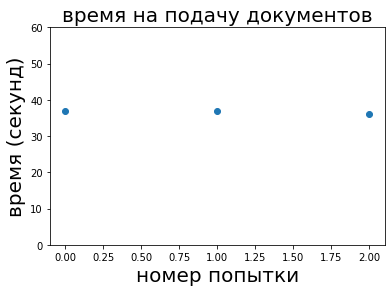

In [219]:
a = 'start'
b = 'docs_uploaded'

values = [(record[b] - record[a]).seconds for record in records]
x = list(range(len(values)))

plt.scatter(x, values)
plt.ylim(0, 60)

plt.xlabel('номер попытки', size=20)
plt.ylabel('время (секунд)', size=20)

plt.title('время на подачу документов', size=20)

Text(0.5, 1.0, 'время на подачу цен')

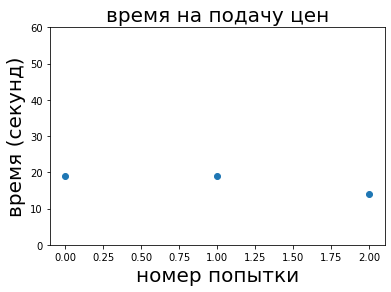

In [220]:
a = 'affiliate'
b = 'end'

values = [(record[b] - record[a]).seconds for record in records]
x = list(range(len(values)))

plt.scatter(x, values)
plt.ylim(0, 60)

plt.xlabel('номер попытки', size=20)
plt.ylabel('время (секунд)', size=20)

plt.title('время на подачу цен', size=20)

In [215]:
for filename in os.listdir(directory):

    path = os.path.join(directory, filename)
    data = list(open(path))

    if any('while connecting: 113: No route to host' in row for row in data):
        print('while connecting: 113: No route to host')
        os.remove(path)
        
    elif any('KeyboardInterrupt' in row for row in data):
        print('KeyboardInterrupt')
        os.remove(path)

while connecting: 113: No route to host
